<a href="https://colab.research.google.com/github/Raidenkyu/hermit-study/blob/master/hermit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
projects_database = pd.read_csv('https://raw.githubusercontent.com/Raidenkyu/hermit-study/master/res/projects.csv?token=AGF4DRYSLVR4IMLZXQIJY33AYEFIS', delimiter=";")
evaluations_database = pd.read_csv('https://raw.githubusercontent.com/Raidenkyu/hermit-study/master/res/evaluations.csv?token=AGF4DR7KIDP57L2HZC3SFZDAYEFGQ', delimiter=";")

In [ ]:
projects_database

,name,count,url,status,build
0,ColorlibHQ/AdminLTE,1,https://github.com/ColorlibHQ/AdminLTE,discarded,NaN
1,serverless/serverless,6,https://github.com/serverless/serverless,discarded,NaN
2,huggingface/transformers,7,https://github.com/huggingface/transformers,discarded,NaN
3,serverless/serverless,6,https://github.com/serverless/serverless,discarded,NaN
4,nylas/nylas-mail,1,https://github.com/nylas/nylas-mail,discarded,NaN
...,...,...,...,...,...
115,facebookresearch/Detectron,1,https://github.com/facebookresearch/Detectron,NaN,NaN
116,streamaserver/streama,2,https://github.com/streamaserver/streama,NaN,NaN
117,horovod/horovod,5,https://github.com/horovod/horovod,NaN,NaN
118,numpy/numpy,2,https://github.com/numpy/numpy,NaN,NaN


In [ ]:
evaluations_database

,name,bloatRatio,missedDependencies,balance,ports,risk,entrypoint
0,athena,0.0,0.0,0,NaN,0,70.6
1,cowait,0.0,36.5,3771,NaN,0,100.0
2,vulcan,0.0,0.0,0,NaN,0,70.6
3,newTrackon,93.6,17.0,3635,100.0,0,100.0
4,sherlock,72.5,42.9,877454,NaN,0,100.0
5,k8s-sidecar,92.2,38.0,0,NaN,0,100.0
6,pipenv,21.5,84.7,56081719,NaN,0,100.0
7,RSSHub,27.1,1.1,18432,100.0,0,70.6
8,gitlab-semantic-versioning,4.0,47.4,8988389,NaN,0,100.0
9,findmeaflat,88.8,0.0,0,NaN,0,0.0


,count
status,
accepted,43
discarded,46


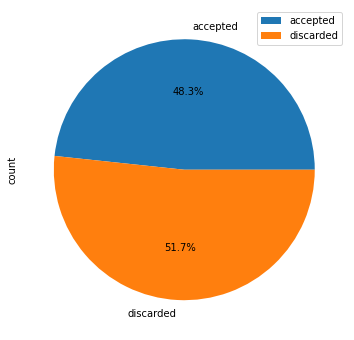

In [ ]:
status_count = projects_database.groupby('status').count()
status_count.plot.pie(y='count', figsize=(6, 6), autopct='%1.1f%%')
status_count.drop(columns=['name', 'url', 'build'])

,count
build,
failed-build,10
require-extra-steps,1
successful,32


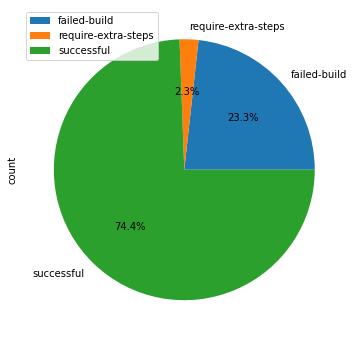

In [ ]:
status_count = projects_database.groupby('build').count()
status_count.plot.pie(y='count', figsize=(6, 6), autopct='%1.1f%%')
status_count.drop(columns=['name', 'url', 'status'])

In [ ]:
print(f"Mean Bloat Ratio: {evaluations_database['bloatRatio'].mean()} %")
print(f"Mean Missed Dependencies Ratio: {evaluations_database['missedDependencies'].mean()} %")
print(f"Mean Balance: {evaluations_database['balance'].mean() / 1000000} MB")
print(f"Mean Ports Detection Accuracy: {evaluations_database['ports'].dropna().mean()} %")
print(f"Mean Risk Percentage: {evaluations_database['risk'].mean()} %")
print(f"Mean Entrypoint Similarity: {evaluations_database['entrypoint'].mean()} %")

Mean Bloat Ratio: 37.57741935483871 %
Mean Missed Dependencies Ratio: 24.354838709677427 %
Mean Balance: 5.905479064516129 MB
Mean Ports Detection accuracy: 100.0 %
Mean Risk Percentage: 0.0 %
Mean Entrypoint similarity: 80.11290322580643 %


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


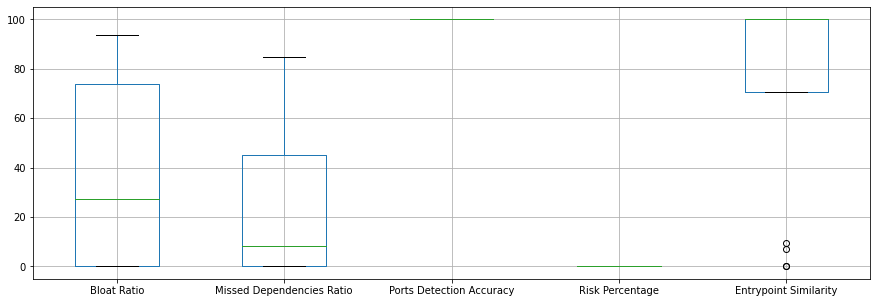

In [ ]:
renamed_evaluations = evaluations_database.rename(columns={
    'bloatRatio': 'Bloat Ratio',
    'missedDependencies': 'Missed Dependencies Ratio',
    'ports': 'Ports Detection Accuracy',
    'risk': 'Risk Percentage',
    'entrypoint': 'Entrypoint Similarity'
})

renamed_evaluations.boxplot(
    column=['Bloat Ratio', 'Missed Dependencies Ratio', 'Ports Detection Accuracy', 'Risk Percentage', 'Entrypoint Similarity'],
    figsize=(15,5)
)

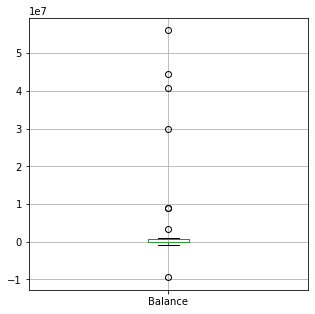

In [ ]:
evaluations_database.rename(columns={'balance':'Balance'}).boxplot(column=['Balance'], figsize=(5, 5))

In [50]:
min = evaluations_database.balance.quantile(0.0)
q1 = evaluations_database.balance.quantile(0.25)
q2 = evaluations_database.balance.quantile(0.50)
q3 = evaluations_database.balance.quantile(0.75)
max = evaluations_database.balance.quantile(1.0)

iqr = q3 - q1
lb = q1 - (1.5 * iqr)
ub = q3 + (1.5 * iqr)

print(f"Min: {min}")
print(f"LB: {lb}")
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"UB: {ub}")
print(f"Max: {max}")

Min: -9459986.0
LB: -1237182.0
Q1: 0.0
Q2: 0.0
Q3: 824788.0
UB: 2061970.0
Max: 56081719.0
